<b> Exploratory Data Analysis </b>

In [1]:
import sys
print(sys.version)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]


In [2]:
df = pd.read_csv("Loan_Default.csv")

df.head(10)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
5,24895,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
6,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
8,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
9,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0


In [3]:
df.shape

(148670, 34)

In [4]:
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148667 entries, 0 to 148669
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gender            148667 non-null  object 
 1   loan_type         148667 non-null  object 
 2   loan_amount       148667 non-null  int64  
 3   rate_of_interest  112229 non-null  float64
 4   term              148626 non-null  float64
 5   property_value    133570 non-null  float64
 6   income            139519 non-null  float64
 7   credit_score      148667 non-null  int64  
 8   age               148467 non-null  object 
 9   ltv               148667 non-null  int32  
 10  region            148667 non-null  object 
 11  status            148667 non-null  int64  
 12  dtir1             124549 non-null  float64
dtypes: float64(5), int32(1), int64(3), object(4)
memory usage: 15.3+ MB


In [6]:
column_list= df.columns.tolist()
column_list

['ID',
 'year',
 'loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'property_value',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'income',
 'credit_type',
 'Credit_Score',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'LTV',
 'Region',
 'Security_Type',
 'Status',
 'dtir1']

In [7]:
# Bank biggest loan was 3milions 576 thousand 5 hundred

df['loan_amount'].max()

3576500

In [8]:
# Bank smallest loan was 16 thousand 5hundred

df['loan_amount'].min()

16500

<b> Data Preprocesing </b>

In [9]:
# search for  missing values

df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [10]:
# Drop year since all entries are from 2019

df.drop(columns=['year'], inplace=True)

In [11]:
# convert all features to lower case

df.columns= df.columns.str.lower()

In [12]:
df.columns

Index(['id', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [13]:
# drop some of the features as a generall factors for bank to consider Loan Application would be
# credit score, income, debt, employment, loan terms, assets

columns= ['id', 'loan_limit', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'security_type']
df.drop(columns,axis=1, inplace =True)

In [14]:
# search for duplicates

df.duplicated().sum()

3

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df["gender"].value_counts()

Male                 42346
Joint                41399
Sex Not Available    37657
Female               27265
Name: gender, dtype: int64

In [18]:
df['age'].value_counts()

45-54    34720
35-44    32816
55-64    32533
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [19]:
df.dtypes

gender               object
loan_type            object
loan_amount           int64
rate_of_interest    float64
term                float64
property_value      float64
income              float64
credit_score          int64
age                  object
ltv                 float64
region               object
status                int64
dtir1               float64
dtype: object

In [20]:
df["gender"]

0         Sex Not Available
1                      Male
2                      Male
3                      Male
4                     Joint
                ...        
148665    Sex Not Available
148666                 Male
148667                 Male
148668               Female
148669               Female
Name: gender, Length: 148667, dtype: object

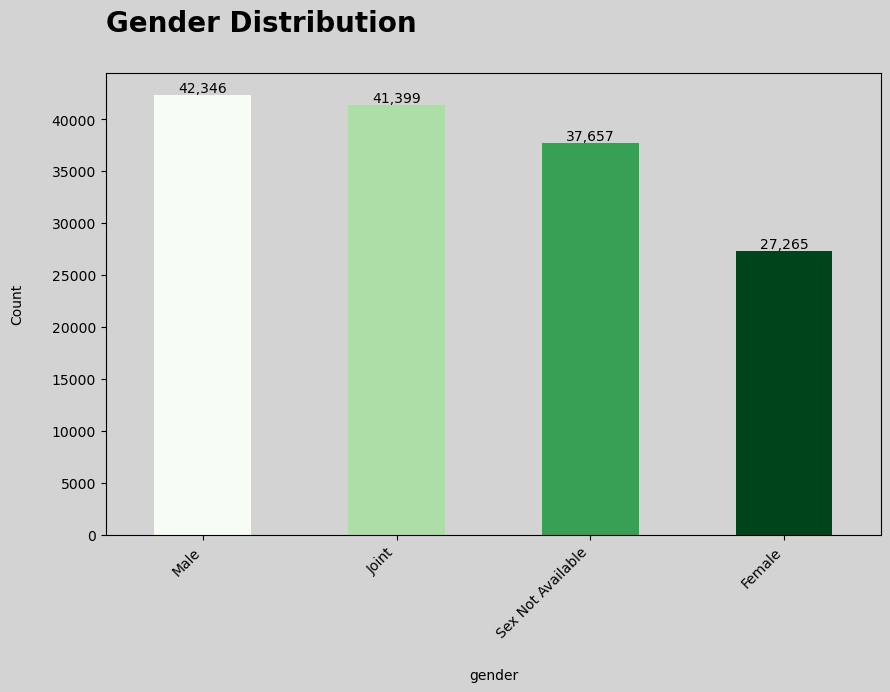

In [21]:
# gender distribution
# Plot the "Gender" column as a bar chart with formatted figures above each bar

import pandas as pd
import matplotlib.pyplot as plt
import locale
import matplotlib.cm as cm

locale.setlocale(locale.LC_ALL, '')


plt.figure(figsize=(10, 6), facecolor="lightgray")


gender_counts = df["gender"].value_counts()
num_categories = len(gender_counts)

green_colors= cm.get_cmap("Greens", num_categories)

ax = gender_counts.plot(kind="bar", color=green_colors(range(num_categories)))
ax.set_facecolor("lightgray")

# format figures by placing dot as thousands separator
formatted_counts = [locale.format_string('%d', value, grouping=True) for value in gender_counts]

# add formated figures above each bar
for index, value in enumerate(gender_counts):
    ax.text(index, value, formatted_counts[index], ha="center", va="bottom", fontsize=10, color="black")


    
plt.xlabel("gender", color = "Black", labelpad = 20)
plt.xticks(rotation = 45, ha= "right")
plt.ylabel("Count", color = "Black", labelpad = 20)
plt.title("Gender Distribution", color = "Black", fontweight = "bold", pad= 30, fontsize= 20,
          loc ="left")
plt.grid(False)

plt.show()


# Based on the dataset, it was observed that males tend to borrow funds more frequently, 
# ranking them first in terms of loan applications. Joint applications secured the second position, 
# while females ranked fourth in terms of application frequency.

In [22]:
# Calculating "Gender" column by percentage values

gender_counts= df["gender"].value_counts()
total_counts= gender_counts.sum()

percent = (gender_counts / total_counts) * 100

print(percent)

Male                 28.483793
Joint                27.846799
Sex Not Available    25.329764
Female               18.339645
Name: gender, dtype: float64


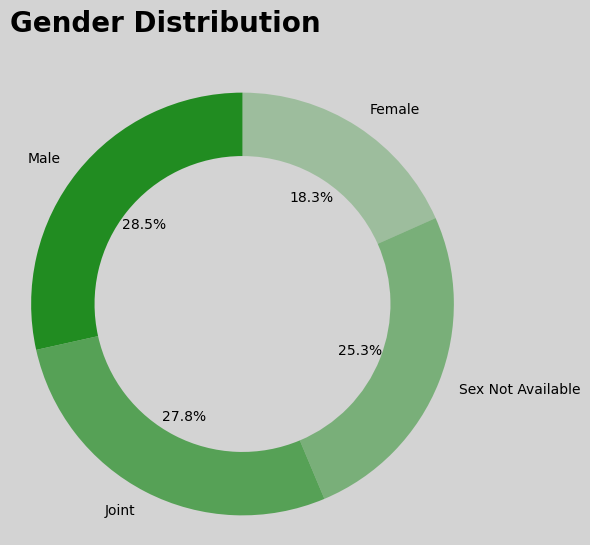

In [23]:
# Plot the "Gender" column as a donut chart



# Define dark green color shades for each category 
colors = [(0.13, 0.55, 0.13, 1), (0.13, 0.55, 0.13, 0.7), (0.13, 0.55, 0.13, 0.5),
          (0.13, 0.55, 0.13, 0.3)]

plt.figure(figsize=(6, 6))
plt.pie(percent, labels=percent.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3),
        colors=colors)


# Add a circle in the middle to convert the pie into a donut chart
center_circle = plt.Circle((0, 0), 0.1, fc='lightgray')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
fig.set_facecolor("lightgray")

plt.axis('equal')
plt.title("Gender Distribution", color = "black", fontweight= "bold", pad = 30, fontsize= 20, 
          loc = "left")

plt.show()

# Male applicants accounted for 28.5% of the total, closely followed by 
# joint applications at 27.8%. Approximately 25.3% of the applications did not specify a gender,
# and female applicants represented 18.3% of the total."

In [24]:
# loan_amount vs region distribution

In [25]:
df["region"].unique()

array(['south', 'North', 'central', 'North-East'], dtype=object)

In [26]:
df[df["region"] == "south"]

,gender,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,ltv,region,status,dtir1
0,Sex Not Available,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,98.728814,south,1,45.0
2,Male,type1,406500,4.560,360.0,508000.0,9480.0,834,35-44,80.019685,south,0,46.0
9,Sex Not Available,type3,436500,3.490,360.0,688000.0,6720.0,788,55-64,63.444767,south,0,30.0
11,Sex Not Available,type1,466500,4.375,360.0,708000.0,9540.0,501,35-44,65.889831,south,0,36.0
19,Sex Not Available,type1,586500,3.175,360.0,748000.0,12540.0,688,55-64,78.409091,south,0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148658,Sex Not Available,type1,386500,NaN,360.0,NaN,4680.0,669,25-34,NaN,south,1,NaN
148659,Sex Not Available,type3,416500,4.375,360.0,608000.0,4080.0,520,65-74,68.503289,south,0,40.0
148661,Sex Not Available,type2,346500,NaN,360.0,358000.0,NaN,585,25-34,96.787710,south,1,NaN
148665,Sex Not Available,type1,436500,3.125,180.0,608000.0,7860.0,659,55-64,71.792763,south,0,48.0


In [27]:
# South Region

south_loan_amount = df[df["region"] == "south"][["region", "loan_amount"]]
south_loan_amount

,region,loan_amount
0,south,116500
2,south,406500
9,south,436500
11,south,466500
19,south,586500
...,...,...
148658,south,386500
148659,south,416500
148661,south,346500
148665,south,436500


In [28]:
south_loan_amount_sum = south_loan_amount["loan_amount"].sum()
south_loan_amount_sum

# Sum of loan_amount for region south is 21 billion, 337 million, 884 thousand 

21337401000

In [29]:
# North Region

north_loan_amount = df[df["region"] == "North"][["region", "loan_amount"]]
north_loan_amount

,region,loan_amount
1,North,206500
3,North,456500
4,North,696500
5,North,706500
6,North,346500
...,...,...
148662,North,646500
148663,North,106500
148667,North,446500
148668,North,196500


In [30]:
north_loan_amount_sum = north_loan_amount["loan_amount"].sum()
north_loan_amount_sum

# Sum of loan_amount for region north is 24 bilion, 697 milion, 733 thousand 

24697606500

In [31]:
# Central Region

central_loan_amount = df[df["region"] == "central"][["region","loan_amount"]]
central_loan_amount

,region,loan_amount
8,central,376500
28,central,186500
38,central,256500
41,central,166500
43,central,236500
...,...,...
148599,central,246500
148613,central,426500
148619,central,416500
148637,central,406500


In [32]:
central_loan_amount_sum = central_loan_amount["loan_amount"].sum()
central_loan_amount_sum

# Sum of loan_amount for region central is 2 billion, 809 million, 907 thousand, 5 hundred 

2809970500

In [33]:
# North-East Region

n_e_loan_amount = df[df["region"] == "North-East"][["region", "loan_amount"]]
n_e_loan_amount

,region,loan_amount
467,North-East,136500
474,North-East,526500
670,North-East,726500
739,North-East,66500
769,North-East,316500
...,...,...
148333,North-East,136500
148343,North-East,196500
148347,North-East,176500
148417,North-East,346500


In [34]:
n_e_loan_amount_sum = n_e_loan_amount["loan_amount"].sum()
n_e_loan_amount_sum

# Sum of loan_amount for region North-East is 381 million, 687 thousand, 5 hundred 

381687500

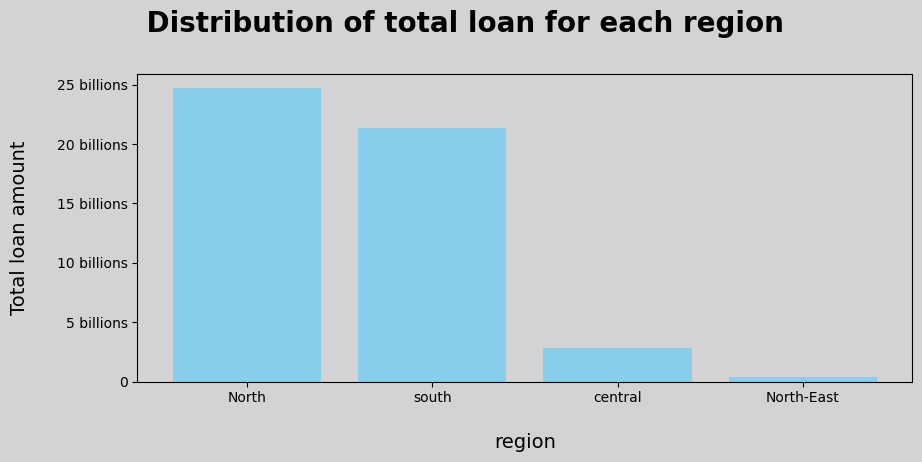

In [35]:
# Plot  loan_amount & region columns

import matplotlib.ticker as mtick

regions = ["south", "North", "central", "North-East"]
sums = [south_loan_amount_sum, north_loan_amount_sum, central_loan_amount_sum, n_e_loan_amount_sum]

data = {"region": regions, "Total loan amount": sums}
df_sorted = pd.DataFrame(data).sort_values(by = "Total loan amount", ascending = False )


plt.figure(figsize = (10,4), facecolor="lightgray")
plt.bar(df_sorted["region"], df_sorted["Total loan amount"], color = "skyblue")
plt.gca().set_facecolor("lightgray")
plt.xlabel("region", labelpad = 20, fontsize = 14, color = "black" )
plt.ylabel("Total loan amount", labelpad = 20, fontsize = 14, color = "black")
plt.title(" Distribution of total loan for each region", color = "black", fontsize = 20,
          fontweight = "bold", pad = 30, loc ="left" )

# formatting y axis for better readability (Ive decided to drop numerical values in y axis)
# plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().set_yticklabels(["0", "5 billions", "10 billions", "15 billions", "20 billions", 
                           "25 billions"])

plt.show()

# The region with the most mortgages given  is North, closely followed by South.
# Central were given almost 3 bilions & North-East has the smallest total loan amount 

In [36]:
# Loan_Amount vs Age distribution

In [37]:
df["age"].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [38]:
# missing age values 

nan_occurrences = pd.isnull(df["age"]).sum()
nan_occurrences

# it was observed that 200 positions hasnt been given any age range

200

In [39]:
age_nan = df[pd.isnull(df["age"])][["age", "loan_amount"]]
age_nan

,age,loan_amount
266,NaN,196500
706,NaN,126500
1150,NaN,176500
1219,NaN,346500
3533,NaN,146500
...,...,...
145071,NaN,156500
147037,NaN,446500
147799,NaN,206500
147974,NaN,616500


In [40]:
sum_age_nun = age_nan["loan_amount"].sum()
sum_age_nun

# sum of loan_amount for missing values is 40 milion, 450 tthousand

40450000

In [41]:
#  <25

less_than_25 = df[df["age"] == "<25"][["age", "loan_amount"]]
less_than_25

,age,loan_amount
63,<25,146500
106,<25,226500
181,<25,176500
214,<25,146500
276,<25,66500
...,...,...
148267,<25,106500
148294,<25,446500
148508,<25,356500
148544,<25,316500


In [42]:
sum_less_than_25 = less_than_25["loan_amount"].sum()
sum_less_than_25

# sum of loan_amount for less than 25 years old is 335milion, 180 thousand and 500

335180500

In [43]:
#  age 25-34

age_25_34 = df[df["age"] == "25-34"][["age", "loan_amount"]]
age_25_34

,age,loan_amount
0,25-34,116500
4,25-34,696500
16,25-34,356500
27,25-34,196500
30,25-34,246500
...,...,...
148646,25-34,366500
148650,25-34,426500
148658,25-34,386500
148661,25-34,346500


In [44]:
sum_age_25_34 = age_25_34["loan_amount"].sum()
sum_age_25_34

# sum of loan_amount for 25-34 years old is 6 billion, 842 milion, 903 thousand and zero

6842903000

In [45]:
# age 35-44

age_35_44 = df[df["age"] == "35-44"][["age", "loan_amount"]]
age_35_44

,age,loan_amount
2,35-44,406500
5,35-44,706500
11,35-44,466500
14,35-44,226500
24,35-44,336500
...,...,...
148634,35-44,166500
148635,35-44,506500
148637,35-44,406500
148640,35-44,156500


In [46]:
sum_age_35_44 = age_35_44["loan_amount"].sum()
sum_age_35_44

# sum of loan_amount for 35-44 years old is 12 billion, 355 milion, 667 thousand and zero

12355184000

In [47]:
# age 45-54

age_45_54 = df[df["age"] == "45-54"][["age", "loan_amount"]]
age_45_54

,age,loan_amount
3,45-54,456500
15,45-54,76500
18,45-54,406500
25,45-54,426500
26,45-54,476500
...,...,...
148656,45-54,226500
148660,45-54,366500
148662,45-54,646500
148667,45-54,446500


In [48]:
sum_age_45_54 = age_45_54["loan_amount"].sum()
sum_age_45_54

# sum of loan_amount for 45_54 years old is 12 bilion, 247 milion, 40 thousand and zero

12247040000

In [49]:
# 55-64
age_55_64 = df[df["age"] == "55-64"][["age", "loan_amount"]]
age_55_64

,age,loan_amount
1,55-64,206500
6,55-64,346500
7,55-64,266500
8,55-64,376500
9,55-64,436500
...,...,...
148652,55-64,96500
148654,55-64,136500
148655,55-64,216500
148665,55-64,436500


In [50]:
sum_age_55_64 = age_55_64["loan_amount"].sum()
sum_age_55_64

# sum of loan_amount for 55-64 years old is 9 billion, 953 million, 241 thousand and zero

9953114500

In [51]:
# 65-74

age_65_74 = df[df["age"] == "65-74"][["age", "loan_amount"]]
age_65_74

,age,loan_amount
12,65-74,206500
17,65-74,156500
20,65-74,306500
23,65-74,316500
38,65-74,256500
...,...,...
148647,65-74,416500
148653,65-74,176500
148657,65-74,326500
148659,65-74,416500


In [52]:
sum_age_65_74 = age_65_74["loan_amount"].sum()
sum_age_65_74

# sum of loan_amount for 65-74 years old is 5 bilion, 36 thousand and zero

5582036000

In [53]:
# >74

age_above_74 = df[df["age"] == ">74"][["age", "loan_amount"]]
age_above_74

,age,loan_amount
21,>74,136500
70,>74,156500
91,>74,346500
114,>74,126500
152,>74,476500
...,...,...
148612,>74,156500
148619,>74,416500
148625,>74,176500
148644,>74,276500


In [54]:
sum_age_above_74 = age_above_74["loan_amount"].sum()
sum_age_above_74

#  sum of loan_amount for above 74 years old is 1 bilion, 870 milion, 757 thousand and 500

1870757500

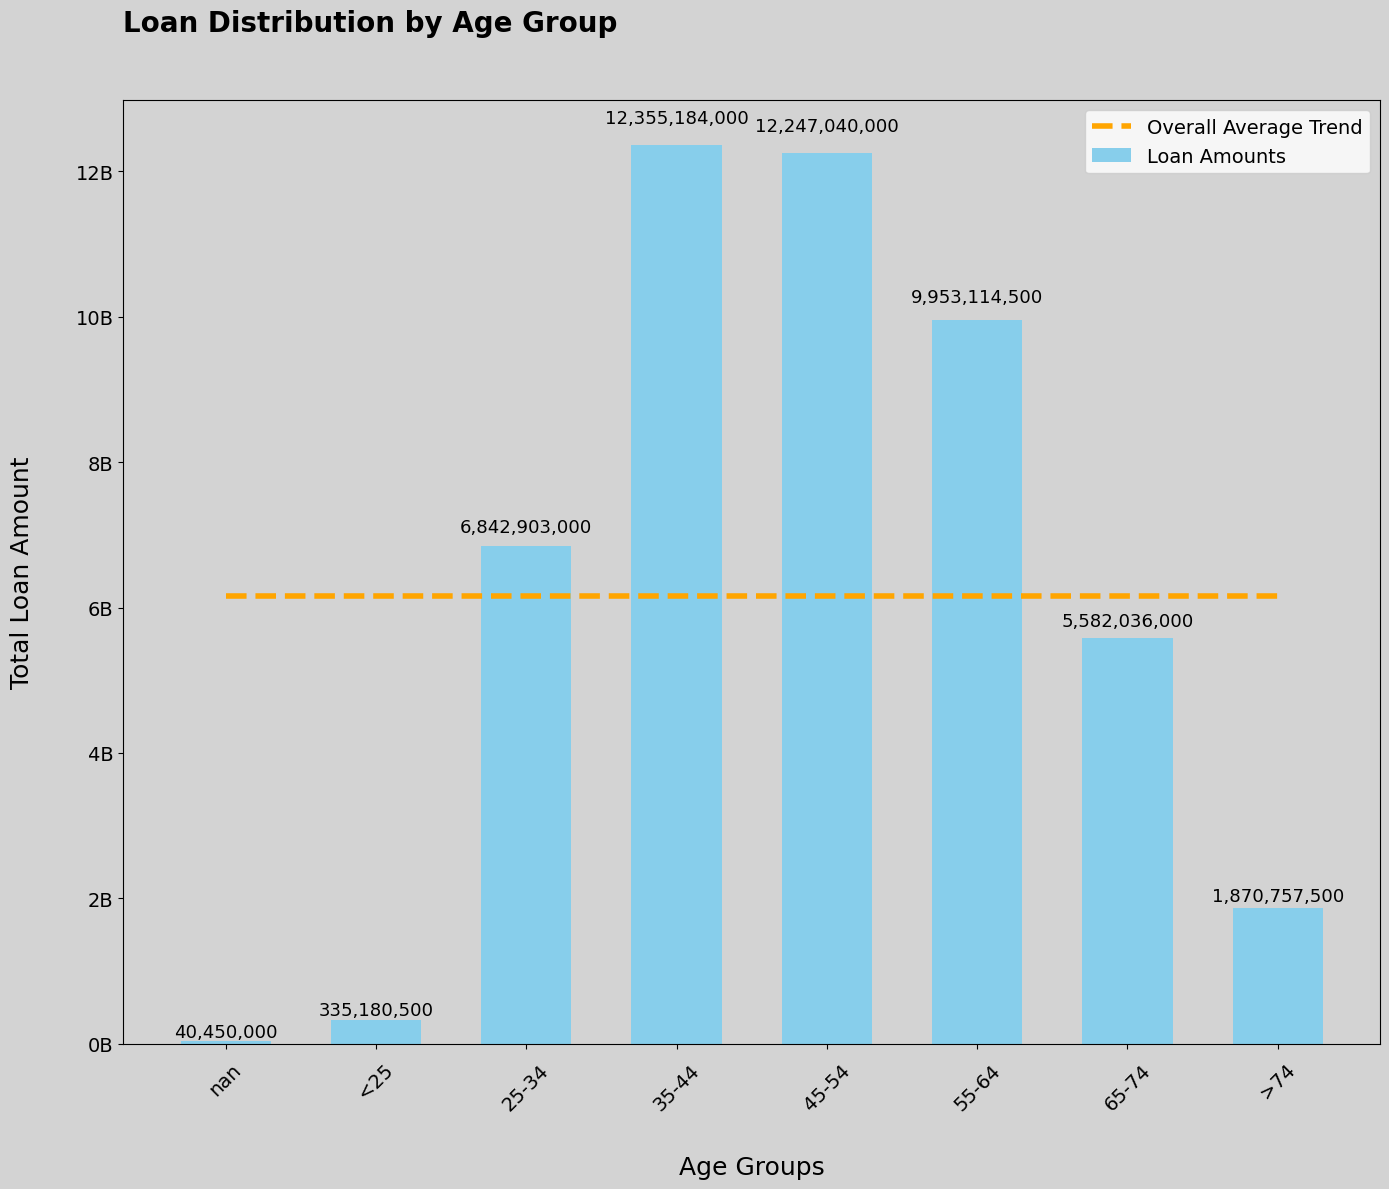

In [55]:
import matplotlib.ticker as mtick

age_groups = ["nan", "<25", "25-34", "35-44", "45-54", "55-64", "65-74", ">74"]
total_loan_amounts = [sum_age_nun, sum_less_than_25, sum_age_25_34, sum_age_35_44,
                      sum_age_45_54, sum_age_55_64, sum_age_65_74, sum_age_above_74]

plt.figure(figsize=(14, 12), facecolor="lightgray")
ax = plt.gca()
ax.set_facecolor('lightgray')

bar_width = 0.6 
plt.bar(age_groups, total_loan_amounts, color="skyblue", width=bar_width, label="Loan Amounts")

plt.xlabel("Age Groups", labelpad=30, fontsize=18, color="black")
plt.ylabel("Total Loan Amount", labelpad=30, fontsize=18, color="black")

plt.title("Loan Distribution by Age Group", pad=50, 
          fontsize=20, loc="left", fontweight="bold", color="black")

for i, amount in enumerate(total_loan_amounts):
    plt.text(age_groups[i], amount * 1.02, f"{amount:,.0f}", 
             ha="center", va="bottom", fontsize=13, color="black")

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.gca().tick_params(axis="x", pad=8)

# Y axis format function
def billions_formatter(x, pos):
    """Converts numbers to billions format (B)"""
    return f"{x / 1e9:.0f}B"


ax.yaxis.set_major_formatter(mtick.FuncFormatter(billions_formatter))

# trend line
average_loan = sum(total_loan_amounts) / len(age_groups)
overall_trend_line = [average_loan] * len(age_groups)
plt.plot(age_groups, overall_trend_line, linestyle='--',linewidth= 4, color='orange', label='Overall Average Trend')

plt.legend(fontsize = 14) 

plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.tight_layout()
plt.grid(False)  

plt.show()


# Among different age groups, the higest amount of money has been given to individuals 
# in the age group between 35-44. This group received the largest sum of money in loans.
# Folowing closely behind the age group 45-55 years also received a substantial amount 
# of loans however as we move to younger and older age groups we can observe a downward
# trend in the loan amounts given

In [56]:
# LTV column analysis

In [57]:
# (loan_amount / property value * 100 )

df["ltv"]

0         98.728814
1               NaN
2         80.019685
3         69.376900
4         91.886544
            ...    
148665    71.792763
148666    74.428934
148667    61.332418
148668    70.683453
148669    72.849462
Name: ltv, Length: 148667, dtype: float64

In [58]:
# convert float into int to round % for better readability

df["ltv"] = df["ltv"].fillna(0)
df["ltv"] = df["ltv"].astype(int)

df["ltv"]

0         98
1          0
2         80
3         69
4         91
          ..
148665    71
148666    74
148667    61
148668    70
148669    72
Name: ltv, Length: 148667, dtype: int32

In [59]:
df_0_30 = df[(df["ltv"] >= 0)  & (df["ltv"] <= 30)]
df_0_30

,gender,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,ltv,region,status,dtir1
1,Male,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,0,North,1,NaN
26,Joint,type3,476500,NaN,360.0,NaN,6780.0,518,45-54,0,south,1,NaN
42,Male,type3,466500,NaN,360.0,NaN,0.0,765,45-54,0,North,1,NaN
51,Male,type1,206500,2.99,180.0,708000.0,9600.0,846,65-74,29,North,0,23.0
52,Joint,type3,136500,NaN,360.0,NaN,3360.0,555,65-74,0,North,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148644,Joint,type1,276500,NaN,180.0,NaN,4140.0,846,>74,0,south,1,NaN
148649,Sex Not Available,type1,256500,NaN,240.0,NaN,8220.0,703,55-64,0,south,1,NaN
148652,Male,type1,96500,NaN,180.0,NaN,5460.0,608,55-64,0,North,1,NaN
148658,Sex Not Available,type1,386500,NaN,360.0,NaN,4680.0,669,25-34,0,south,1,NaN


In [60]:
rows_0_30 = len(df_0_30)
rows_0_30

# 19,462 apllicants has loan to value 0- 30 %

19461

In [61]:
df_31_60 = df[(df["ltv"] >= 31)  & (df["ltv"] <= 60)]
df_31_60

,gender,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,ltv,region,status,dtir1
15,Male,type1,76500,NaN,360.0,138000.0,2220.0,685,45-54,55,North,1,20.0
20,Joint,type1,306500,2.990,180.0,558000.0,16860.0,668,65-74,54,North,0,6.0
36,Male,type1,406500,4.000,360.0,1018000.0,9180.0,651,55-64,39,south,0,38.0
37,Joint,type1,656500,3.375,360.0,1108000.0,9660.0,716,45-54,59,North,0,42.0
44,Sex Not Available,type1,866500,NaN,360.0,1508000.0,13620.0,876,35-44,57,south,1,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148636,Female,type1,486500,4.375,360.0,888000.0,6600.0,580,45-54,54,North,0,42.0
148639,Sex Not Available,type2,586500,3.625,360.0,1788000.0,5880.0,844,45-54,32,south,0,50.0
148641,Sex Not Available,type1,336500,4.250,360.0,578000.0,4140.0,502,45-54,58,south,0,37.0
148654,Female,type1,136500,3.990,360.0,338000.0,5100.0,654,55-64,40,North,0,22.0


In [62]:
rows_31_60 = len(df_31_60)
rows_31_60

# 29,858 apllicants has loan to value between 31- 60 %

29858

In [63]:
df_61_90 = df[(df["ltv"] >= 61)  & (df["ltv"] <= 90)]
df_61_90

,gender,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,ltv,region,status,dtir1
2,Male,type1,406500,4.560,360.0,508000.0,9480.0,834,35-44,80,south,0,46.0
3,Male,type1,456500,4.250,360.0,658000.0,11880.0,587,45-54,69,North,0,42.0
5,Joint,type1,706500,3.990,360.0,1008000.0,10080.0,864,35-44,70,North,0,40.0
6,Joint,type1,346500,4.500,360.0,438000.0,5040.0,860,55-64,79,North,0,44.0
7,Female,type1,266500,4.125,360.0,308000.0,3780.0,863,55-64,86,North,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,Sex Not Available,type1,436500,3.125,180.0,608000.0,7860.0,659,55-64,71,south,0,48.0
148666,Male,type1,586500,5.190,360.0,788000.0,7140.0,569,25-34,74,south,0,15.0
148667,Male,type1,446500,3.125,180.0,728000.0,6900.0,702,45-54,61,North,0,49.0
148668,Female,type1,196500,3.500,180.0,278000.0,7140.0,737,55-64,70,North,0,29.0


In [64]:
rows_61_90 = len(df_61_90)
rows_61_90
    
# 76,480  apllicants has loan to value between 61- 90 %

76478

In [65]:
df_91_99 = df[(df["ltv"] >= 91)  & (df["ltv"] <= 99)]
df_91_99

,gender,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,ltv,region,status,dtir1
0,Sex Not Available,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,98,south,1,45.0
4,Joint,type1,696500,4.000,360.0,758000.0,10440.0,602,25-34,91,North,0,39.0
16,Joint,type2,356500,NaN,360.0,368000.0,5340.0,846,25-34,96,North,1,44.0
17,Male,type1,156500,NaN,360.0,168000.0,3120.0,534,65-74,93,North,1,44.0
29,Female,type1,436500,3.625,360.0,468000.0,4920.0,647,35-44,93,south,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148599,Joint,type2,246500,3.990,360.0,258000.0,3060.0,781,55-64,95,central,0,61.0
148615,Male,type1,476500,3.375,360.0,518000.0,7260.0,508,55-64,91,south,0,30.0
148645,Joint,type3,506500,4.375,360.0,508000.0,7620.0,545,65-74,99,south,0,42.0
148661,Sex Not Available,type2,346500,NaN,360.0,358000.0,NaN,585,25-34,96,south,1,NaN


In [66]:
rows_91_99 = len(df_91_99)
rows_91_99

# 21,071 apllicants has loan to value between 91- 99 %

21071

In [67]:
df_100 = df[df["ltv"] >= 100]
df_100

,gender,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,ltv,region,status,dtir1
96,Male,type3,286500,NaN,360.0,258000.0,NaN,872,65-74,111,south,1,NaN
180,Joint,type3,326500,4.25,360.0,318000.0,6480.0,621,25-34,102,south,0,28.0
192,Female,type1,116500,NaN,360.0,108000.0,1980.0,882,55-64,107,North,1,37.0
216,Female,type2,316500,NaN,300.0,298000.0,8220.0,782,35-44,106,North,1,59.0
268,Female,type1,206500,NaN,360.0,188000.0,2580.0,500,55-64,109,North,1,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148397,Female,type1,106500,NaN,360.0,88000.0,2880.0,731,65-74,121,central,1,30.0
148442,Male,type2,166500,NaN,360.0,158000.0,6360.0,607,55-64,105,North,1,20.0
148458,Male,type3,216500,NaN,360.0,198000.0,14640.0,611,65-74,109,North,1,15.0
148493,Male,type1,126500,NaN,156.0,118000.0,3660.0,545,45-54,107,North,1,51.0


In [68]:
rows_100 = len(df_100)
rows_100

# 1,799 apllicants has loan to value above 100 %

1799

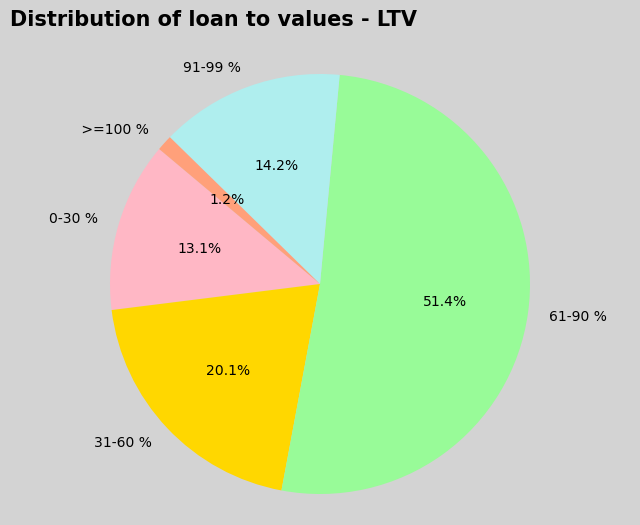

In [69]:
ltv_range = ["0-30 %", "31-60 %", "61-90 %", "91-99 %", " >=100 %"]
sizes = [rows_0_30,rows_31_60, rows_61_90, rows_91_99, rows_100]



colors = ["#FFB7C5", "#FFD700", "#98FB98", "#AFEEEE", "#FFA07A"]


plt.figure(figsize=(8, 6), facecolor="lightgray") 
plt.pie(sizes, labels=ltv_range, autopct="%1.1f%%", startangle=140, colors= colors)
plt.axis("equal") 
plt.title("Distribution of loan to values - LTV ",  fontsize=15, loc = "left",
          fontweight="bold", pad = 20)  


plt.show()


# Approximately 52% of borrowers have a loan-to-value (LTV) ratio between 61% and 90% on their
# mortgages. Only 1.2% of applicants have LTV ratios exceeding 100%, indicating a situation where
# they owe more on the mortgage than the property's value. This may occur due to sudden drops in 
# property values or multiple missed mortgage payments

In [72]:
cleaned_df = pd.DataFrame(df)

cleaned_df.to_csv("C:/Users/katar_223g2eq/OneDrive/Katarina_Data_Science/Data Science/Github/Loan_Default/cleaned_loan_default.csv", index = False)